In [167]:
import numpy as np
import pandas as pd

In [168]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [169]:
!wget $data

--2025-11-23 00:37:24--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.4’

car_fuel_efficiency 100%[===================>] 853.70K  3.46MB/s    in 0.2s    

2025-11-23 00:37:24 (3.46 MB/s) - ‘car_fuel_efficiency.csv.4’ saved [874188/874188]



In [170]:
pd.read_csv('car_fuel_efficiency.csv')

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [171]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [172]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [173]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [174]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [175]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

In [193]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

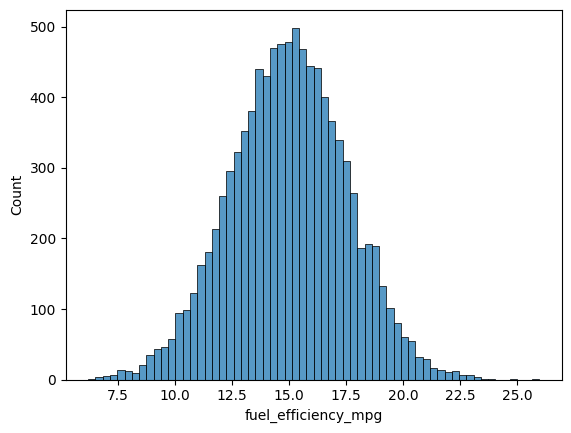

In [178]:
sns.histplot(df.fuel_efficiency_mpg)

In [200]:
means = list(df[features].dropna().mean().values)

In [180]:
df['horsepower'].dropna().median()

np.float64(149.0)

In [181]:
n = len(df)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n-n_val-n_test

In [182]:
n, n_test, n_val, n_train

(9704, 1940, 1940, 5824)

In [183]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([ 483, 7506, 8795, ..., 5390,  860, 7270], shape=(9704,))

In [184]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train+ n_val]]
df_test = df.iloc[idx[n_train+ n_val:]]

In [185]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


# replace NaN with zero

In [186]:
df_train = df_train.reset_index(drop = 'True')
df_val = df_val.reset_index(drop = 'True')
df_test = df_test.reset_index(drop = 'True')

In [187]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
1,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
2,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
3,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
4,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209
...,...,...,...,...,...,...,...,...,...,...,...
5819,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0,16.964054
5820,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0,10.059094
5821,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0,17.593237
5822,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0,18.925748


In [188]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [189]:
y_train, y_val, y_test

(array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
        18.92574819, 17.96528447], shape=(5824,)),
 array([15.36634109, 14.60118181, 12.24703219, ..., 13.61312692,
        13.73334321, 15.81604972], shape=(1940,)),
 array([15.80435416, 14.27237387, 11.74844072, ..., 18.40443466,
        20.50246014, 16.81624056], shape=(1940,)))

In [190]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [194]:
def prepare_X_zero(df):
    df = df.copy()
    df = df.fillna(0)
    

    X = df[features].values
    return X
    

In [195]:
prepare_X_zero(df_train)

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [196]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inverse = np.linalg.inv(XTX)
    w_full = XTX_inverse.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [197]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

In [198]:
X_train = prepare_X_zero(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_pred = prepare_X_zero(df_val)
y_pred = w0 + X_pred.dot(w)
rmse(y_val,y_pred)

np.float64(0.5173782638844466)

In [201]:
means

[np.float64(199.8377056469542),
 np.float64(149.65729212983547),
 np.float64(3000.6620570250284),
 np.float64(2011.475655847043)]

In [209]:
def prepare_X_mean(df):
    df = df.copy()
    
    # 1. Select only the columns we need
    df_features = df[features]
    
    # 2. Calculate the mean and fill NaNs in one step.
    # Pandas automatically aligns the 'horsepower' mean to the 'horsepower' column.
    df_features = df_features.fillna(df_features.mean())
    
    # 3. Return the numpy array
    X = df_features.values
    return X

In [207]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inverse = np.linalg.inv(XTX)
    w_full = XTX_inverse.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [208]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

In [211]:
X_train = prepare_X_mean(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_pred = prepare_X_mean(df_val)
y_pred = w0 + X_pred.dot(w)
rmse(y_val,y_pred)

np.float64(0.4636236995020941)

In [212]:
def prepare_X_zero(df):
    df = df.copy()
    df = df.fillna(0)
    

    X = df[features].values
    return X

In [213]:
def train_linear_regression_reg(X,y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    
    XTX_inverse = np.linalg.inv(XTX)
    w_full = XTX_inverse.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [214]:
X_train = prepare_X_zero(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_pred = prepare_X_zero(df_val)
y_pred = w0 + X_pred.dot(w)
rmse(y_val,y_pred)

np.float64(0.5173782638844466)

In [215]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    rmse = np.sqrt(mse)
    return rmse

In [217]:
for r in [0.0, 0.00001, 0.0001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)

    print(r, w0, score)

0.0 28.82736547365895 0.5173782638844466
1e-05 28.82285530197122 0.5173777673577595
0.0001 28.782327170764983 0.517373325130925
0.01 24.92683841981215 0.5171115525769823
0.1 11.239661084581073 0.5187525130702517
1 1.7315979411219746 0.5222348802093141
10 0.18306246621686947 0.5229812979636599
